# Time-series Data Analysis Study

## Week2: Overview and Statistics-based Forecasting 

## 2020년 10월 11일 안상호


1. [Overview (이론)](#1.-Overview)
2. [Time-Series Data (데이터)](#2.-Introduction-To-Date-And-Time)
3. Time-Series Property (분해, 추세)
4. Time-Series Model (모델)



### 주요 참고자료

- Kaggle
    + [Time series Basics : Exploring traditional TS](https://www.kaggle.com/jagangupta/time-series-basics-exploring-traditional-ts)
    + [Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/#data)
- Medium & Tistory
    + [The Complete Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)
    + [Open Machine Learning Course. Topic 9. Part 1. Time series analysis in Python](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3)
    + [시계열 분석 이론의 기초](https://yamalab.tistory.com/112)
- 기타
    + [software carpentry](https://statkclee.github.io/statistics/stat-time-series-eda.html)
    + [Forecasting: Principles and Practice - R](https://otexts.com/fppkr/)
    + [Online Textbook](https://people.duke.edu/~rnau/411home.htm)
    + [Time Series Analysis (TSA) in Python - Linear Models to GARCH](http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016)


---

# Requirement

In [59]:
import math 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import yule_walker

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

# 1. Overview


> 이 섹션은 Medium의 [The Complete Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)와 tistory [시계열 분석](https://freedata.tistory.com/36)을 주로 참고하였습니다. 

금융, 에너지 소비 예측 등에서 시간(time)은 중요한 factor 중 하나이다. 예를 들면 하루 중에 전기 소비가 최고치를 찍는지를 예측하는 것은, 전기의 가격이나 생산을 조절할 수 있게 하므로 흥미롭다고 할 수 있다. 시계열(time-series)은 시간에 따라 정렬된 데이터 포인트의 시리즈라고 볼 수 있다. 시계열에서, 시간은 종종 독립변수로 사용되고, 목표는 대개 미래를 예측하는 것이다.



## 1.1. Time-Series 기초 용어

> [용어 출처] 

|  용어  |  설명  |  용어  |  설명  |
| :----- | :----- | :----- | :----- |
| (1) 시점(time point) | 어느 한 특정 점(순간) | (5) 추세(trend) | 정의 관계, 부의 관계 처럼 파동의 방향이 있을 때를 말한다.|
| (2) 적시성(timeliness) | 언제 시행하느냐 | (6) 동향(drift) | 파동의 방향이 없을 때를 말한다. 무작위성을 뛴다.|
| (3) 기간(period) | **시점**과 **시점** 사이의 거리 | (7) 시간의 성격 | - 독립변수의 역할(원인)이지만 실체는 없다.  |
| (4) 시차(time lag) | - **기간**의미 + 변화량 <br/> - **시점**과 **시점** 사이의 거리 + 그 사이의 변화 | |- 시간은 독립적이다.(방정식에서 시간 자체가 변수로 들어가지 않는다. <br/> - 시간은 대리변수(proxy variable)이다. (모든 구체적인 사안을 통합적인 파동으로 해석한다.)|


## 1.2. 시계열을 구성하는 4가지 요소

### 추세변동(trend variation)

> 시계열 자료가 갖는 장기적인 변화 추세

- 짧은 기간의 시계열 자료에서는 추세변동 찾기 어려움
- 급격히 변하는 것이 아니라 직선이나 브드러운 곡선의 연장선으로 표시

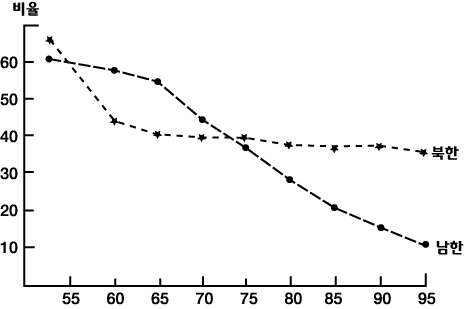



### 순환변동(cyclical variation)

> 대체로 2 ~ 3년 정도의 일정한 기간 주기로 나타내는 추세

- 시간의 흐름에 따라 사하로 반복되는 변동으로 추세선을 따라 변화하는 것을 의미
- 주기적으로 파도처럼 반복 곡선으로 나타나므로 삼각 함수 관계로 표시되기도 함
- 하지만 실제로 순환변동을 나타내는 적합한 함수를 구하는 것은 쉽지 않다.


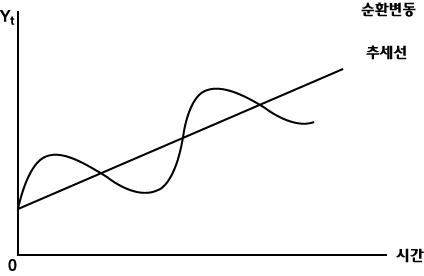


### 계절변동(seasonal variation)

> 계절을 주기로 발생하는 변동 요인

- 계절에 따라 순환하며 변하는 특성을 지님
- 순환변동보다 주기가 짧은 것이 특징
- 대부분의 경제 관련 시계열들은 추세와 계절 요인을 동시에 포함

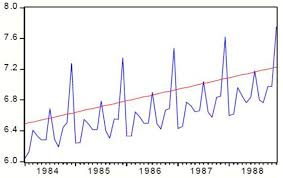



### 불규칙변동(irregular variation)

> 시계열 자료에서 어떤 규칙성이 없어 예측 불가능하게 우연적으로 발생하는 변동

- 위의 세가지 변동 요인을 조정한 후에 나타나는 변동
- 시계열 자료로 예측을 할때, 불규칙 변동이 많이 존재한다면 신뢰성 있는 예측을 하기 힘듬





## 1.2. Autocorrelation (자기상관)

> Informally, **autocorrelation** is the similarity between observations as a function of the time lag between them.

![https://miro.medium.com/max/700/1*F5wTJgw8dpteJssJVGXPcg.png](https://miro.medium.com/max/700/1*F5wTJgw8dpteJssJVGXPcg.png)


- 해당 그림에서는 첫번째 값과 24번째 값이 높은 자기상관 관계를 가지고 있음을 확인할 수 있다. (비슷하게 12번째와 36번째도
    - sinusoidal shape (sin형)

    → 24 단위 시간 마다 비슷한 값을 얻을 수 있다. 

    → 이는 seasonality를 이해하는데 힌트가 될 것
    
### AutoCorrelation Function(ACF; 자기상관함수)

- 자기상관함수는 시계열 관측치들이 서로 관계하는 방식을 측정해주는 함수이다.
- 즉, k 시간 단위로 구분된 시계열의 관측치($Y_t$ 및 $Y_{t-k}$)간의 상관의 측도를 말한다. 
- 첫번째는 비교할 대상이 없기 때문에 lag(시차) 값이 0인 지점을 빼고 판단한다. (차분에서도 비슷한 상황 발생)

### Partial AutoCorrelation Function(PACF; 부분자기상관함수)

- 부분자기상관함수는, 편 자기상관함수라고도한다. 
- 다른 모든 짧은 시차 항에 따라 조정한 후 k 시간 단위로 구분된 시계열($Y_{t-1}, Y_{t-2}, \dots Y_{t-k-1}$)의 관측치($Y_t$ 및 $Y_{t-k}$)간 상관성의 척도입니다.


## 1.3. Stationarity(정상성) and Differencing(차분)

> A time series is said to be **stationary** if its statistical properties do not change over time.



![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0fec4391-bb6b-484f-9a3e-e078551e5b02/Untitled.png](https://miro.medium.com/max/700/1*xwMPhair-k-djWtULbEObQ.png)

- 이 과정은 stationary하다고 말할 수 있는데, 평균과 분산이 시간마다 그렇게 차이가 나지 않기 때문이다.


### Stationary

> 정태성이라고도 하며, 일정하여 늘 한결 같은 성질을 뜻한다.

![구글에 많이 뜨는 이미지](https://t1.daumcdn.net/cfile/tistory/990E723C5C39D35C22)

- 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태 $\rightarrow$ 시계열의 평균이 시간 축에 평행하다는 의미
- 시계열 자료를 시계열 모형에 적합시키기 위한 전제 조건
- 비정상 시계열은 정상 시계열로 변환해야 하며, 대체로 차분을 이용한다.

### Differencing

> 차분은 현시점 자료에서 전 시점 자료를 빼는 것을 의마한다.

- 일반 차분은 바로 전 시점의 자료를 빼는 것
- 계절 차분은 여러 시점 전의 자료를 빼는 것






## 1.4. 정상성 테스트

정상성을 판별하기 위한 통계적 검정 (Dickey-Fuller)

 

$$\begin{cases} p>0 & ,\text{not stationary} \\ p = 0  &, \text{stationary} \end{cases}$$

![https://miro.medium.com/max/700/1*glPAXrlIM2jqMRh-hbACnQ.png](https://miro.medium.com/max/700/1*glPAXrlIM2jqMRh-hbACnQ.png)

위의 시계열은 정상성을 만족하지 않음



---

# 2. Introduction To Date And Time

우선 예제 데이터는 크게 2가지의 source에서 사용했으며, [DJIA 30 Stock Time Series](https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231)에서 주가 데이터를, [Historical Hourly Weather Data 2012-2017](https://www.kaggle.com/selfishgene/historical-hourly-weather-data) 날씨 데이터를 다운 받아 사용한다.

- Google Stocks Data
- Humidity in different world cities
- Microsoft Stocks Data
- Pressure in different world cities

In [3]:
google = pd.read_csv('data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [4]:
microsoft = pd.read_csv('data/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

In [5]:
humidity = pd.read_csv('data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00        NaN      81.0            NaN     93.0         24.0   
2017-11-29 21:00:00        NaN      71.0            NaN     87.0         21.0   
2017-11-29 22:00:00        NaN      71.0            NaN     93.0         23.0   
2017-11-29 23:00:00        NaN      71.0            NaN     87.0         14.0   
2017-11-30 00:00:00        NaN      76.0            NaN     75.0         56.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00       72.0       18.0     68.0         37.0    18.0  ...   
2017-11-29 21:00:00       72.0       18.0     73.0         34.0    12.0  ...   
2017-11-29 22:00:00       68.0       17.0     60.0         32.0    15.0  ...   
2017-11-29 23:00:00       63.0       17.0     33.0         30.0    28.0  ...   
2017-11-30 00:00:00       72.0       17.0     23.0         34.0    31.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00          27.0       NaN      64.0    37.0        NaN   
2017-11-29 21:00:00          29.0       NaN      59.0    74.0        NaN   
2017-11-29 22:00:00          31.0       NaN      66.0    74.0        NaN   
2017-11-29 23:00:00          26.0       NaN      58.0    56.0        NaN   
2017-11-30 00:00:00          32.0       NaN      58.0    56.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00:00:00                NaN    NaN    NaN        NaN        NaN  

[5 rows x 36 columns]

## 2.1. Data Preprocessing

- 우선은 간단하게 `fillna()` 정도로 [[파라미터 조사]](https://rfriend.tistory.com/262)
    + 0: 결측값을 모두 0으로
    + 'missing': 결측값을 모두 'missing' 이라는 스트링으로
    + `method` = 'ffill' or 'pad': 결측값들을 앞 방향으로 채워나간다.
    + `method` = 'bfill' or 'backfill': 결측값들을 뒷방향으로 채워나간다.

즉, 시계열의 경향성을 보존하기 위해 바로 직전의 데이터로 결측값을 채워나가는 방법


In [6]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   
2012-10-01 15:00:00       76.0      80.0           86.0     80.0         88.0   
2012-10-01 16:00:00       77.0      80.0           85.0     79.0         88.0   
2012-10-01 17:00:00       78.0      79.0           84.0     79.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0  ...   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 15:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 16:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 17:00:00       80.0       21.0     24.0         49.0    63.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00          71.0      58.0      93.0    68.0       50.0   
2012-10-01 14:00:00          70.0      57.0      91.0    68.0       51.0   
2012-10-01 15:00:00          70.0      57.0      87.0    68.0       51.0   
2012-10-01 16:00:00          69.0      57.0      84.0    68.0       52.0   
2012-10-01 17:00:00          69.0      57.0      80.0    68.0       54.0   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2012-10-01 13:00:00               63.0   22.0   51.0       51.0       50.0  
2012-10-01 14:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 15:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 16:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 17:00:00               62.0   23.0   51.0       51.0       50.0  

[5 rows x 36 columns]

## 2.2. Data Visualization

- `asfreq` method is used to convert a time series to a specified frequency. 

In [9]:
humid_freqm = humidity["Kansas City"].asfreq('M')
humid_freqm

datetime
2012-10-31 13:00:00     69.0
2012-11-30 13:00:00     84.0
2012-12-31 13:00:00     68.0
2013-01-31 13:00:00     71.0
2013-02-28 13:00:00     86.0
                       ...  
2017-06-30 13:00:00     88.0
2017-07-31 13:00:00     77.0
2017-08-31 13:00:00    100.0
2017-09-30 13:00:00     63.0
2017-10-31 13:00:00     74.0
Freq: M, Name: Kansas City, Length: 61, dtype: float64

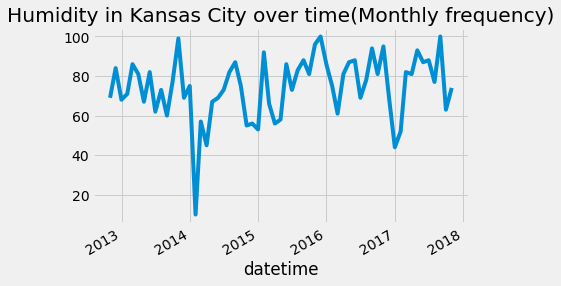

In [10]:
humid_freqm.plot() # Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

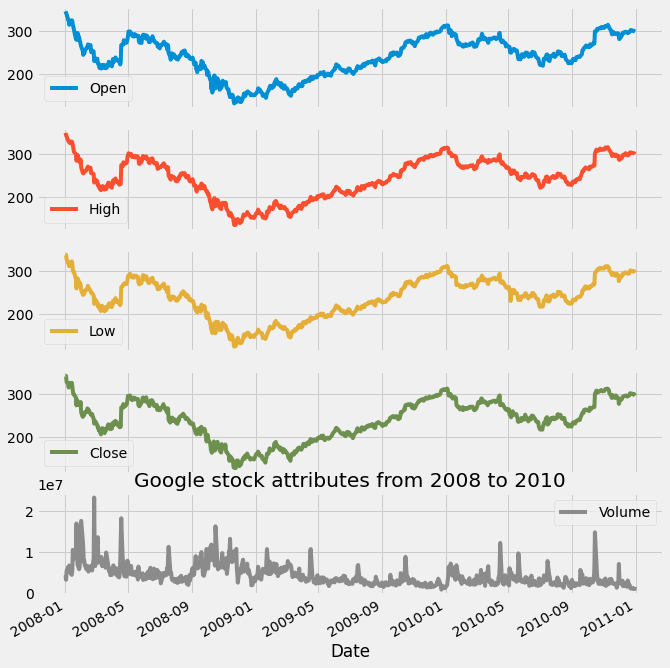

In [11]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
# plt.savefig('stocks.png')
plt.show()

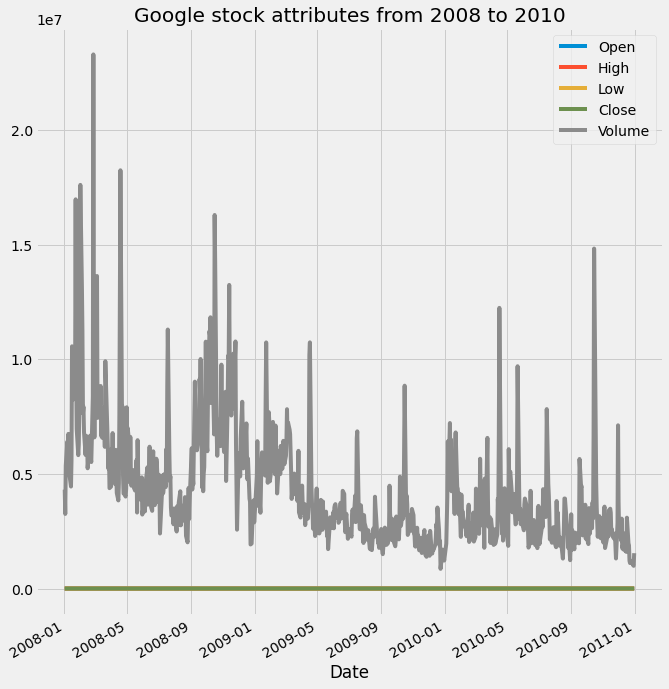

In [12]:
google['2008':'2010'].plot(subplots=False, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
# plt.savefig('stocks.png')
plt.show()

## 2.3. Shifting and Resampling

### Shifting
시계열 데이터의 index를 원하는 periodes의 숫자만큼 시간 빈도와 함께 이동시킬 수 있다. 즉, 시계열을 과거의 자기 자신과 비교할때 유용하다.

`shift` 함수를 통해 쉽게 적용가능

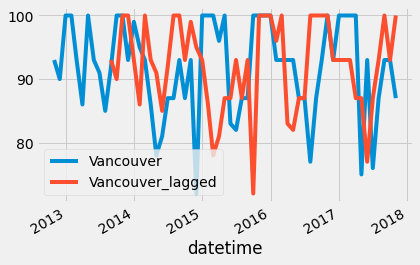

In [13]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

### Resampling 





- **Downsampling**: 시계열이 고빈도에서 저빈도로 다시 샘플링됩니다 (eg. 매주에서 월간 빈도로). 기존 데이터를 aggregation하는 과정이 포함됩니다.
- **Upsampling**: 시계열이 저빈도에서 고빈도로 다시 샘플링됩니다 (eg.월간 빈도에서 일 빈도로). 누락된 데이터 채우기(filling) 또는 보간(interpolating)이 포함됩니다.

이미지에서의 업스케일링과 다운스케일링과 비슷한 개념
![](https://post-phinf.pstatic.net/MjAxNzA5MjFfNzIg/MDAxNTA1OTc5NTgyODgx.JMjyL6ZpMbvFrb_6HjweJVWjIS6a3WPCYdg_-YNjtdQg.PKXXrOvZ12Iv-yb0FwWiNOqow0No3uV-wfu2gkOrUsUg.PNG/1.png?type=w1200)


In [14]:
# Shape before resampling(downsampling)
humid_copy = humidity.copy()
humidity.shape

(45252, 36)

In [15]:
# We downsample from hourly to 3 day frequency aggregated using mean
humid_copy = humid_copy.resample('3D').mean()
humid_copy.head()

Vancouver   Portland  San Francisco    Seattle  Los Angeles  \
datetime                                                                  
2012-10-01  75.203390  68.389831      61.457627  64.813559    61.067797   
2012-10-04  45.277778  43.888889      67.791667  48.680556    70.638889   
2012-10-07  56.138889  43.083333      72.611111  54.250000    74.680556   
2012-10-10  81.805556  66.500000      71.361111  69.972222    66.597222   
2012-10-13  90.388889  83.166667      73.541667  81.819444    64.013889   

            San Diego  Las Vegas    Phoenix  Albuquerque     Denver  ...  \
datetime                                                             ...   
2012-10-01  66.000000  16.728814  21.389831    38.847458  52.474576  ...   
2012-10-04  72.791667  16.152778  24.472222    20.152778  43.277778  ...   
2012-10-07  71.402778  19.416667  27.888889    39.694444  59.861111  ...   
2012-10-10  65.402778  38.555556  31.986111    29.166667  38.166667  ...   
2012-10-13  66.513889  59.305556  39.833333    43.902778  57.652778  ...   

            Philadelphia   New York   Montreal     Boston  Beersheba  \
datetime                                                               
2012-10-01     66.949153  58.915254  70.610169  75.644068  70.610169   
2012-10-04     80.902778  86.361111  92.972222  75.597222  66.013889   
2012-10-07     70.222222  66.208333  79.916667  76.708333  62.527778   
2012-10-10     66.027778  69.569444  71.527778  75.513889  56.361111   
2012-10-13     54.569444  55.750000  72.847222  66.291667  66.027778   

            Tel Aviv District      Eilat      Haifa  Nahariyya  Jerusalem  
datetime                                                                   
2012-10-01          71.491525  37.305085  59.491525  59.644068  56.118644  
2012-10-04          65.000000  48.097222  68.916667  68.916667  65.041667  
2012-10-07          64.625000  40.319444  64.361111  64.361111  61.791667  
2012-10-10          64.152778  35.041667  63.055556  63.055556  56.527778  
2012-10-13          67.166667  41.263889  63.486111  63.486111  57.805556  

[5 rows x 36 columns]

In [16]:
# Shape after resampling(downsampling)
humid_copy.shape

(629, 36)

In [17]:
# upsample from 3day to daily frequency
humid_copy = humid_copy.resample('D').pad()
humid_copy.head()

Vancouver   Portland  San Francisco    Seattle  Los Angeles  \
datetime                                                                  
2012-10-01  75.203390  68.389831      61.457627  64.813559    61.067797   
2012-10-02  75.203390  68.389831      61.457627  64.813559    61.067797   
2012-10-03  75.203390  68.389831      61.457627  64.813559    61.067797   
2012-10-04  45.277778  43.888889      67.791667  48.680556    70.638889   
2012-10-05  45.277778  43.888889      67.791667  48.680556    70.638889   

            San Diego  Las Vegas    Phoenix  Albuquerque     Denver  ...  \
datetime                                                             ...   
2012-10-01  66.000000  16.728814  21.389831    38.847458  52.474576  ...   
2012-10-02  66.000000  16.728814  21.389831    38.847458  52.474576  ...   
2012-10-03  66.000000  16.728814  21.389831    38.847458  52.474576  ...   
2012-10-04  72.791667  16.152778  24.472222    20.152778  43.277778  ...   
2012-10-05  72.791667  16.152778  24.472222    20.152778  43.277778  ...   

            Philadelphia   New York   Montreal     Boston  Beersheba  \
datetime                                                               
2012-10-01     66.949153  58.915254  70.610169  75.644068  70.610169   
2012-10-02     66.949153  58.915254  70.610169  75.644068  70.610169   
2012-10-03     66.949153  58.915254  70.610169  75.644068  70.610169   
2012-10-04     80.902778  86.361111  92.972222  75.597222  66.013889   
2012-10-05     80.902778  86.361111  92.972222  75.597222  66.013889   

            Tel Aviv District      Eilat      Haifa  Nahariyya  Jerusalem  
datetime                                                                   
2012-10-01          71.491525  37.305085  59.491525  59.644068  56.118644  
2012-10-02          71.491525  37.305085  59.491525  59.644068  56.118644  
2012-10-03          71.491525  37.305085  59.491525  59.644068  56.118644  
2012-10-04          65.000000  48.097222  68.916667  68.916667  65.041667  
2012-10-05          65.000000  48.097222  68.916667  68.916667  65.041667  

[5 rows x 36 columns]

In [18]:
# Shape after resampling(upsampling)
humid_copy.shape

(1885, 36)

---

# 3. Time-Series Properties

## 3.1. Trends, seasonality and noise

- Trend - 시계열의 일관된 상향 또는 하향 기울기
- Seasonality - 시계열의 명확한 주기적 패턴 (eg. $\sin$ 함수)
- Noise - Outliers or missing values

<AxesSubplot:xlabel='Date'>

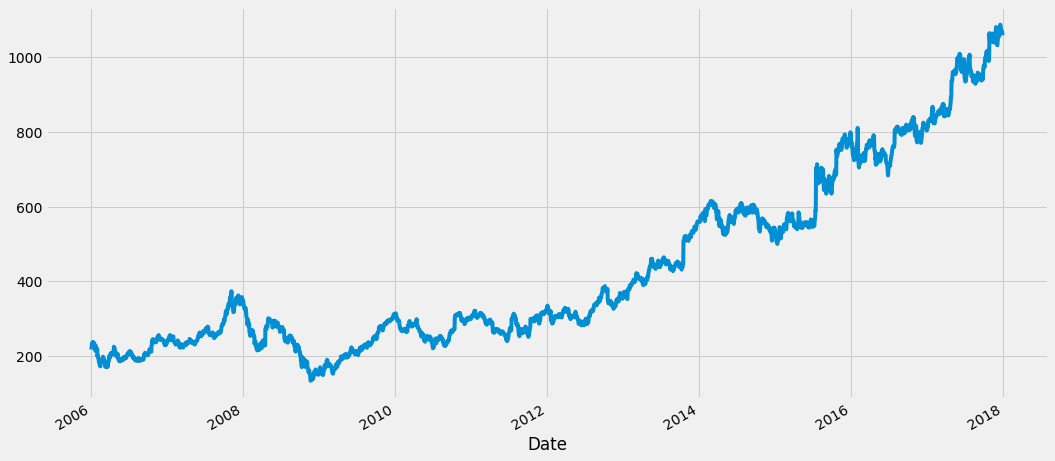

In [20]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

- `statsmodels.tsa.seasonal.seasonal_decompose`(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0): 시계열 분해
    + model: "additive" or "multiplicative"
    
[[parameter discription]](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

<ipython-input-24-12c708da421a>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual


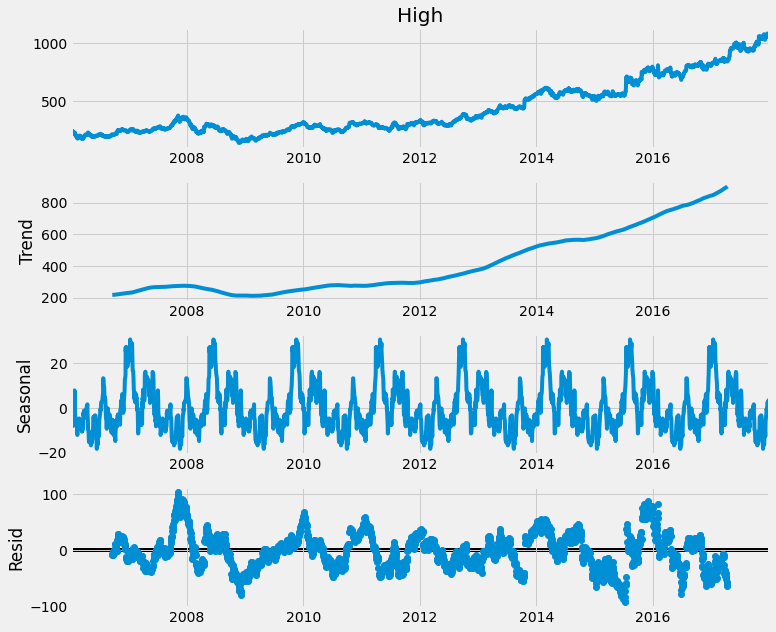

In [24]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

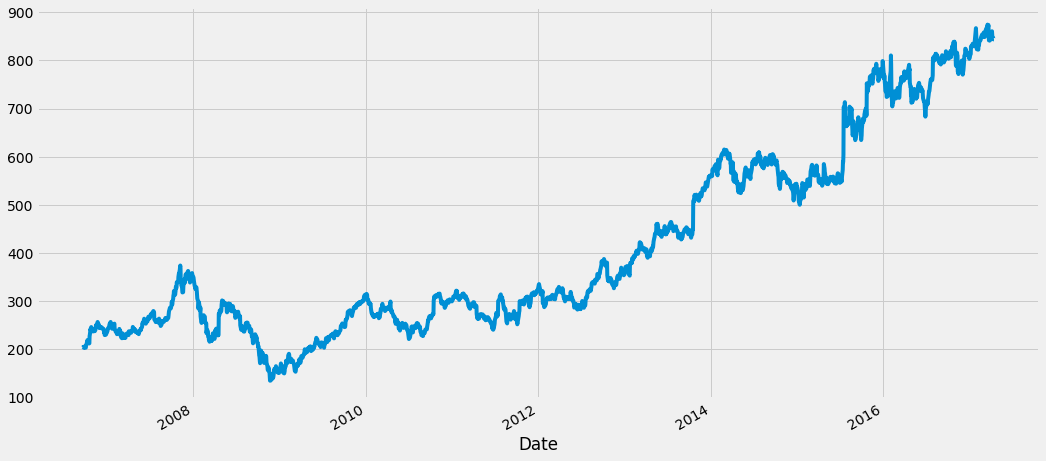

In [29]:
(decomposed_google_volume.seasonal + decomposed_google_volume.trend + decomposed_google_volume.resid).plot(figsize=(16,8))

## 3.2. White noise

> 자기상관(autocorrelation)이 없는 시계열을 백색잡음(white noise)이라고 부릅니다. [[출처]](https://otexts.com/fppkr/wn.html)


이제 시계열 데이터를 분석하는 모델들의 아이디어를 알아볼텐데, 아이디어들을 이해할 때 가장 기본적인 개념이 백색 잡음이다. 백색 잡음은 확률 과정을 구성하는 모든 개별 확률 변수(e_t)들이 서로 독립이고 동일한 분포(e.g. 가우시안)를 따르는 확률 과정을 말한다. 일반적으로 자료에서는 백색 잡음을 $\epsilon$ 으로 표현한다. 그리고 각각의 확률 변수들의 분포가 가우시안 정규 분포를 따르면 가우시안 백색 잡음, 아니면 비-가우시안 백색 잡음이라고 불린다. 백색 잡음은 시계열 데이터를 정상 시계열 데이터로 분석하는 과정에서 필요한 개념이고, 이해하기 쉬운 개념으로 비유하면 회귀분석에서의 잔차(Residual)과 비슷한 것이라고 생각할 수 있다.

AR 모델에서는 $\epsilon_t$ 라는 항으로 붙어서 불규칙 데이터를 정상화 시키는 Whitening 작업에 사용되며, 일종의 정규화 과정이다.


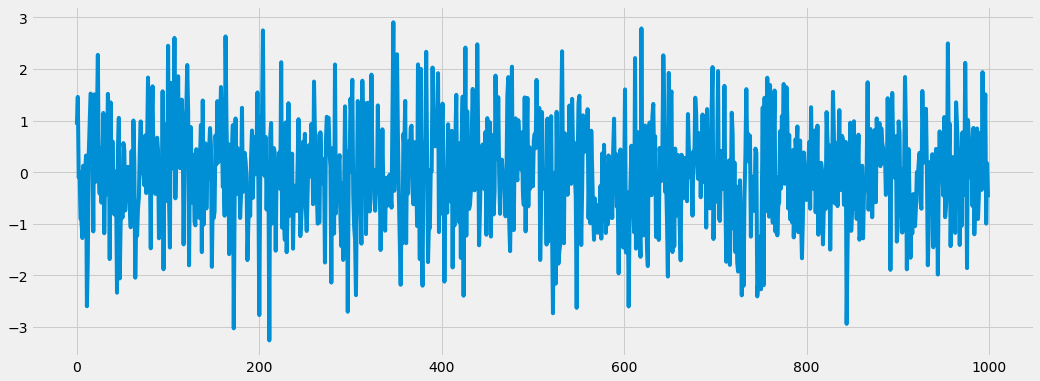

In [30]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

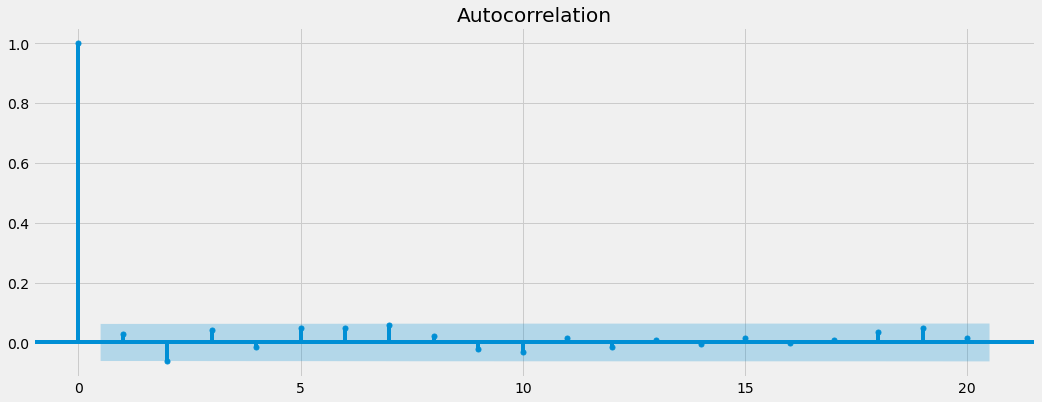

In [33]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

## 3.3. Random Walk

Random Walk는 노이즈가 랜덤이기 때문에, 잘 예측할 수 없다. (정상성을 말하는 속성인가)

분산이 변화하는 시계열


랜덤워크는 다음과 같은 재귀식으로 표현된다.

오늘 = 어제 + 잡음

수학적으로 표현하면

$$Y_t = Y_{t-1} + \epsilon_t$$

차분(diff())을 하게 되면 백색잡음 과정으로 환원된다.

$$Y_t - Y_{t-1}=  \epsilon_t$$




### Augmented Dickey-Fuller test

> 정상성을 테스트하는 검정!

$$\begin{cases} p>0 & ,\text{not stationary} \\ p = 0  &, \text{stationary} \end{cases}$$

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [34]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776520446
p-value of google: 6.510719605768313e-07


In [35]:
adf

(-5.7337233761506905,
 6.510719605768313e-07,
 28,
 2990,
 {'1%': -3.4325389374354,
  '5%': -2.862507130612779,
  '10%': -2.5672848292524693},
 93970.81883700858)

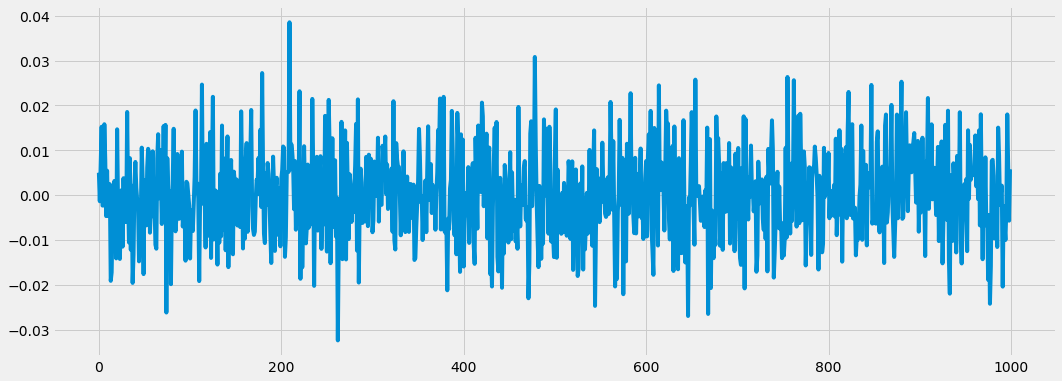

In [36]:
np.random.seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = np.random.normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

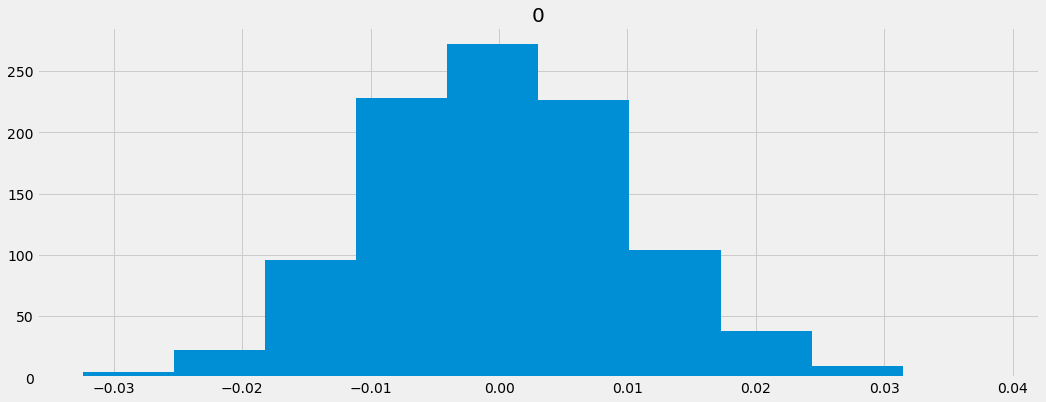

In [37]:
pd.DataFrame(random_walk).hist()

In [38]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

## 3.4. Stationarity

> A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

정상 시계열은 평균, 분산, 자기상관관계 등에 있어서 시간이 지나도 상수인 (변화가 없는) 것을 말한다. 

---

# 4. Time-Series Model

> 모델 설명의 경우 [Y.LAB tistory](https://yamalab.tistory.com/112)의 글도 참고하여서 작성되었습니다. 



### 일반 선형확률과정 모형(General linear proess model)

정상 확률 과정에서 가장 일반적으로 사용되는 모형은 일반 선형확률과정 모형이다. 이 모형은 시계열 정보가 백색 잡음의 현재 값과 과거 값들의 선형 조합으로 이루어져 있다고 가정한다. 일반적으로 아래와 같은 식으로 효현한다.

$$Y_t = \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \psi_3\epsilon_{t-3} + \cdots$$

일반 선형확률과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형들이 존재한다. 일반적으로 우리가 알고 있는 시계열 모형들은 지금까지 설명한 이론적 뿌리를 두고 있는 것이다.

- MA(Moving Average) 모형
- AR(Auto-Regressive) 모형
- ARMA(AR + MA) 모형

## 4.1. Auto-Regressive (AR)


> 자기회귀(autoregressive; AR) 모델은 예측을 위해 과거의 데이터를 선형 결합(linear combination)한 모델입니다. 이전의 자신의 관측값이 이후의 자신의 관측값에 영향을 준다는 아이디어의 모형으로 RNN과도 유사한 아이디어로 볼 수 있습니다. [[출처]](https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401) 

- 시계열 데이터로 회귀 분석을 할 때의 불확실성을 포함하기 위해, 혹은 불규칙 시계열 데이터를 잡아주기 위해 노이즈 사용
- 자신의 최신 과거에 기반한 변동 루틴을 파악하기에 적합
- 즉, 윈도우 밖에서 트렌드가 위아래로 변동하는 경우에는 부적합
    + 이 경우 MA 모델이 적합


$$R_t = c + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \cdots + \phi_p R_{t-p} + \epsilon_t$$

$$X(t) = c + (\sum_{i=1}^{n}w_{t-1} * X_{t-1} )  + \epsilon_t$$

- $t$: 과거 참조 범위 
- $c$: 상수
- $\epsilon$: noise


대체로, AR 모델은 오직 정상시계열에만 적용된다. 이는 파라미터 $\phi$의 범위를 제한하는데, $-1 < \phi < 1$ 이다. 

$$
\begin{cases} 
-1 < \phi < 1 \rightarrow \text{stationary} \\
\phi = 1 \rightarrow \text{random walk} \\
\phi = 0 \rightarrow \text{white noise} \\
\end{cases}
$$


### 시뮬레이션
다음과 같은 식을 시뮬레이션 하고 시각화 해보자

$$R_t = 1 + 0.33R_{t-1} + 0.5R_{t-2}$$

In [39]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1]) # 이동평균 ma는 나중에 고려합니다.

simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

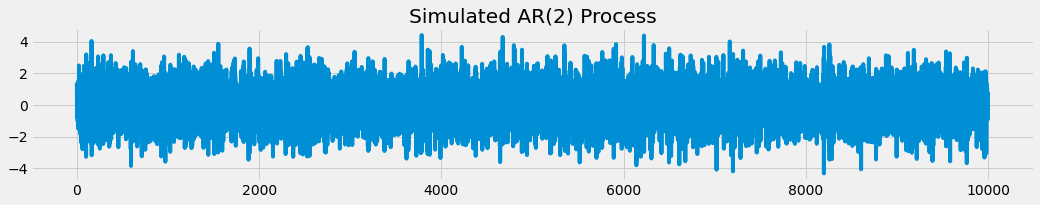

In [40]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)

plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

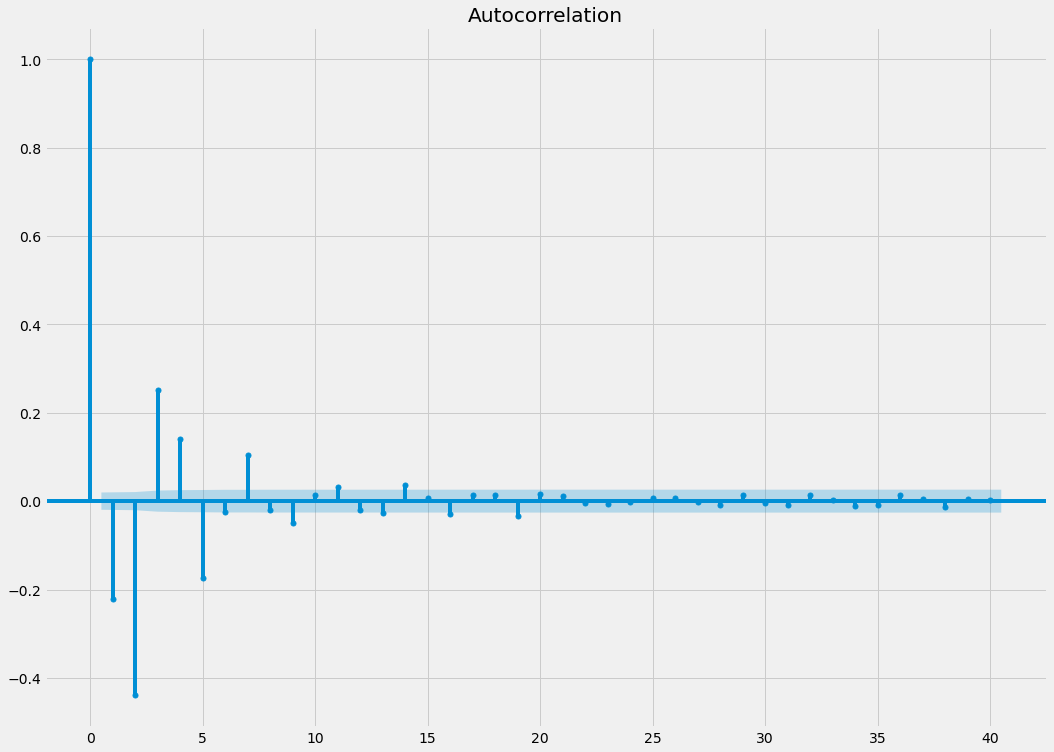

In [41]:
# 자기상관관계 파악
plot_acf(simulated_AR2_data);

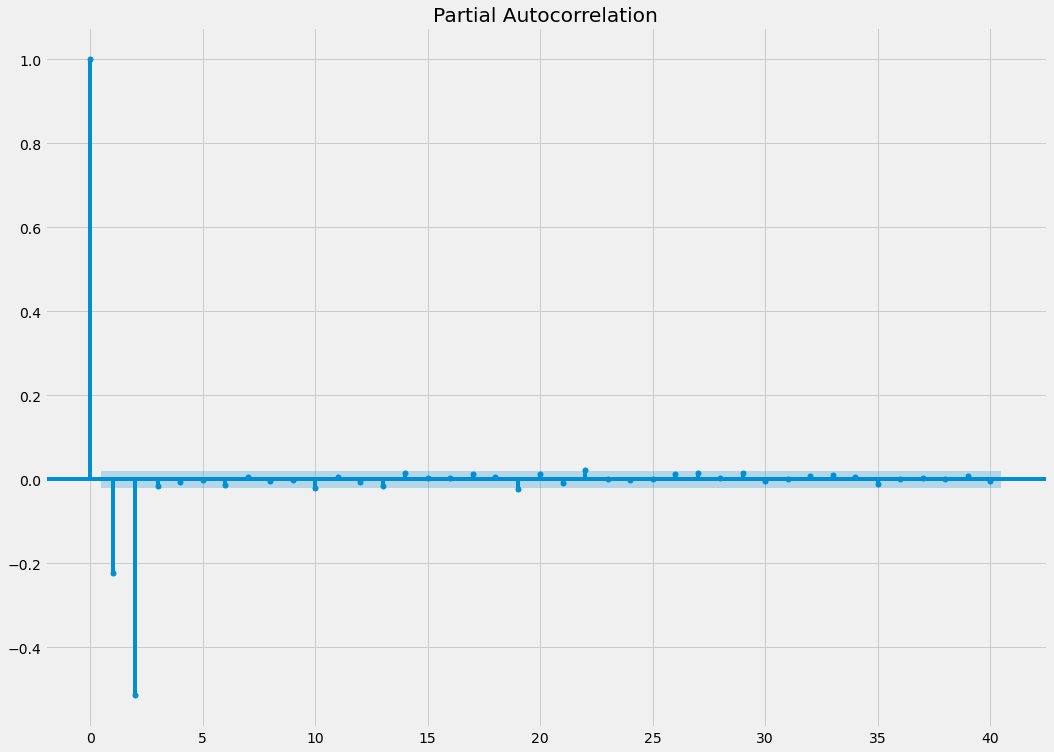

In [42]:
# 부분 자기상관관계 파악
plot_pacf(simulated_AR2_data);

In [43]:
pacf_coef_AR2 = pacf(simulated_AR2_data)
print(pacf_coef_AR2)

[ 1.00000000e+00 -2.22105747e-01 -5.14671477e-01 -1.52303001e-02
 -5.68873638e-03 -2.51967862e-03 -1.35264288e-02  6.67000159e-03
 -2.90216126e-03 -1.05132427e-03 -1.96395261e-02  6.38664556e-03
 -5.83703318e-03 -1.64955432e-02  1.51819103e-02  4.20030049e-03
  2.95418706e-03  1.21494649e-02  4.62974239e-03 -2.20560276e-02
  1.31166861e-02 -8.61474951e-03  2.16452677e-02  8.32783307e-04
 -1.31301252e-03 -4.43264028e-05  1.26310876e-02  1.50561943e-02
  3.89886532e-03  1.49169438e-02 -3.74367550e-03  6.01840319e-05
  8.92492309e-03  9.41134839e-03  6.06822434e-03 -1.18308269e-02
  5.01673501e-04  2.89422034e-03 -8.06027660e-05  8.72587507e-03
 -4.47904837e-03]


/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1016: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.



In [44]:
rho, sigma = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.33635955 0.5145632 ]
sigma: 1.002441161285753


### 주가 예측

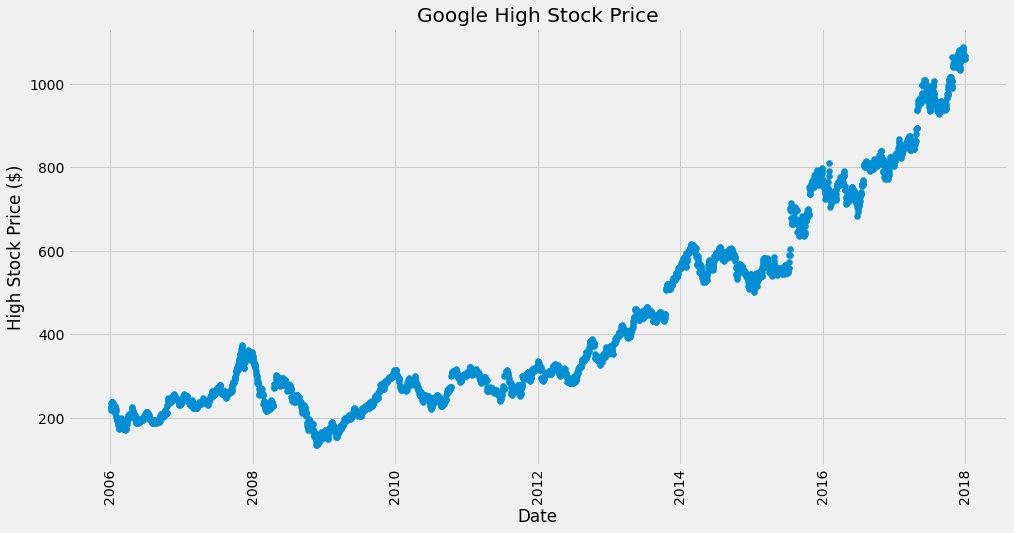

In [45]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(google.index, google['High'])
plt.title('Google High Stock Price')
plt.ylabel('High Stock Price ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [46]:
# Take the log difference to make data stationary
google_copy = google.copy()
google_copy['High'] = np.log(google_copy['High'])
google_copy['High'] = google_copy['High'].diff()
google_copy = google_copy.drop(google_copy.index[0]) # High의 첫번째 값은 NaN을 가지게 되므로
google_copy.head()

Open      High     Low   Close    Volume   Name
Date                                                         
2006-01-04  222.17  0.030042  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  0.005769  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  0.041133  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  0.006138  230.70  233.68  12795837  GOOGL
2006-01-10  232.44 -0.006691  231.25  235.11   9104719  GOOGL

변환된 시계열을 시각화 해보면, trend가 제거된 것을 볼 수 있다. 하지만 우리는 해당 데이터가 정상 시계열인지 판별해야하는데, 이때 Dicker-Fuller test를 이용한다. 

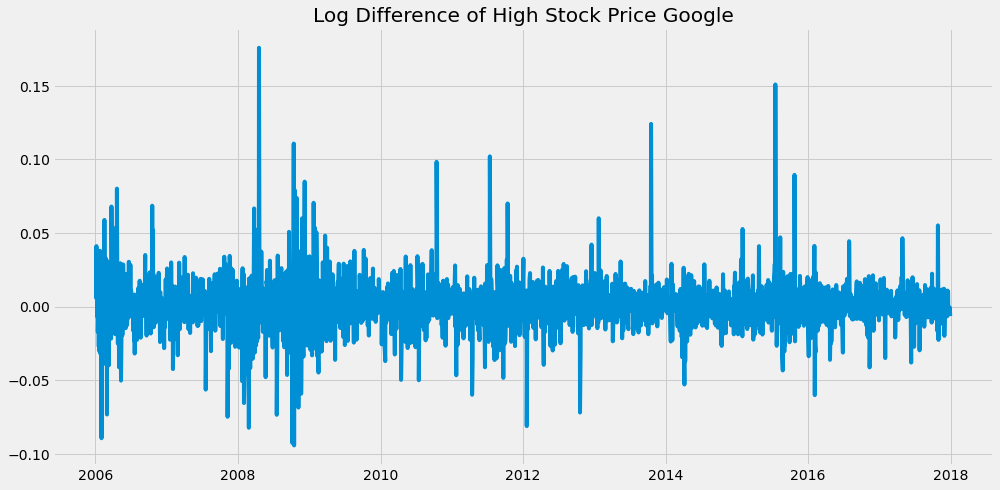

In [47]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(google_copy['High'])
plt.title("Log Difference of High Stock Price Google")
plt.show()

In [48]:
ad_fuller_result = adfuller(google_copy['High'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -37.53142378736811
p-value: 0.0


절대값이 상당히 큰 ADF 통계치를 얻을 수 있고, 이는 p-value가 거의 0에 근접하므로 귀무가설(null hypothesis)를 기각하고 이 시계열이 정상적이라고 말할 수 있다.

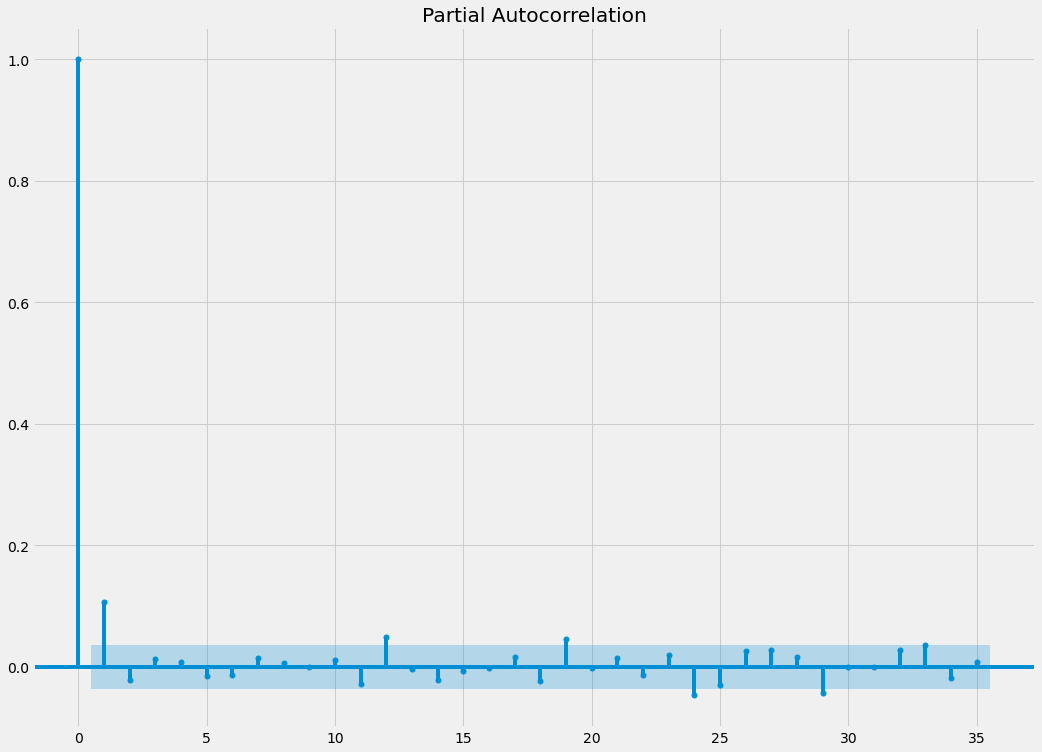

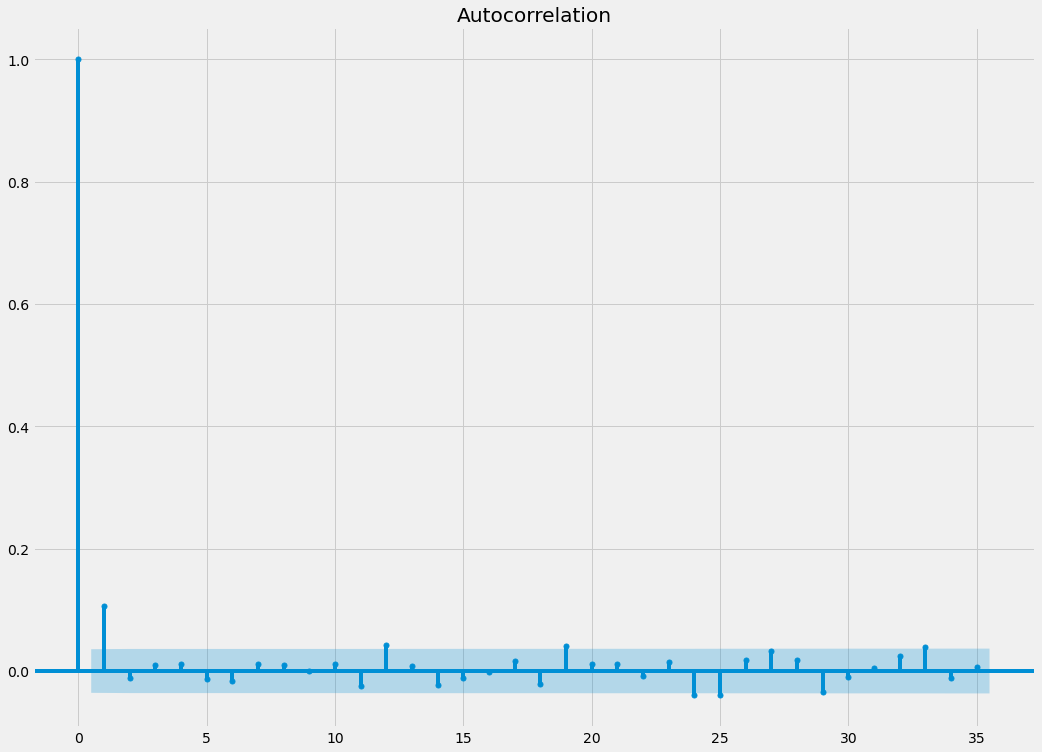

In [49]:
plot_pacf(google_copy['High']);
plot_acf(google_copy['High']);

In [50]:
# Try a AR(4) model
rho, sigma = yule_walker(google_copy['High'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.10892834  0.02358879 -0.01289003 -0.00799862]
sigma: 0.01587838580181676


In [61]:
model = ARMA(google_copy["High"], order=(4, 0))
result = model.fit()

print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored wh

                              ARMA Model Results                              
Dep. Variable:                   High   No. Observations:                 3018
Model:                     ARMA(4, 0)   Log Likelihood                8220.612
Method:                       css-mle   S.D. of innovations              0.016
Date:                Fri, 16 Oct 2020   AIC                         -16429.223
Time:                        23:22:38   BIC                         -16393.149
Sample:                             0   HQIC                        -16416.252
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.622      0.105      -0.000       0.001
ar.L1.High     0.1090      0.018      5.986      0.000       0.073       0.145
ar.L2.High    -0.0236      0.018     -1.288      0.1

### Predicting the models

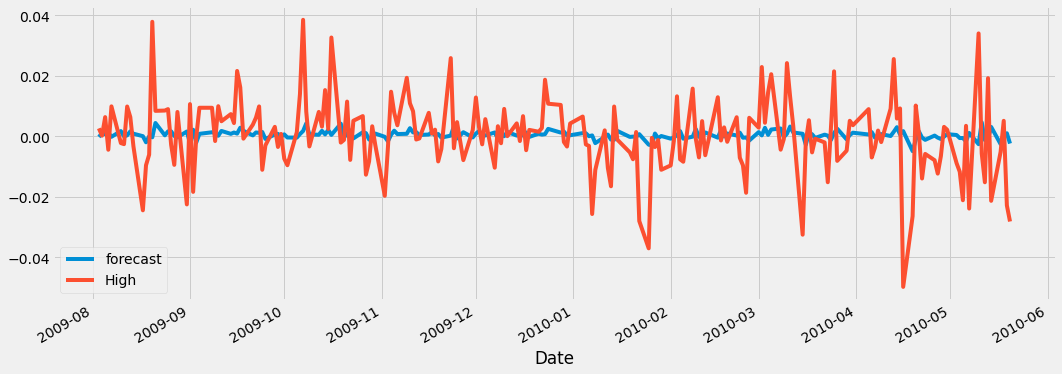

In [62]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1100)
plt.show()

## 4.2. Moving Average (MA)

> 이동 평균 모델은 트렌드(평균 혹은 시계열 그래프에서의 y값)가 변화하는 상황에서 적합한 회귀모델이다. 위에서 설명한 AR과 수식적으로 아주 작은 차이만을 보이지만, 의미는 전혀 다르다. 수식은 아래와 같다.

$$X(t) = (\epsilon_{t-1} * w) + b + (\epsilon_t * u)$$



- AR의 수식과 비교해보면, 단지 $X(t-1)$이 $\epsilon_{t-1}$로 바뀌었을 뿐 
- 이는 이전 항에서의 상태($X(t-1)$)를 이용하여 새로운 상태를 추론하는 것이 아니라, 이전 항에서의 오차($e(t-1)$) 혹은 변동값을 이용하여 현재 항의 상태를 추론하겠다는 것 
- 즉, 변화하는 트렌드를 반영하려는 의미



- MA(1)
$$R_t = \mu + \epsilon_t1 + \theta\epsilon_{t-1}$$

Today's return = mean + today's noise + yesterday's noise


/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Fri, 16 Oct 2020   AIC                         307043.965
Time:                        23:23:34   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

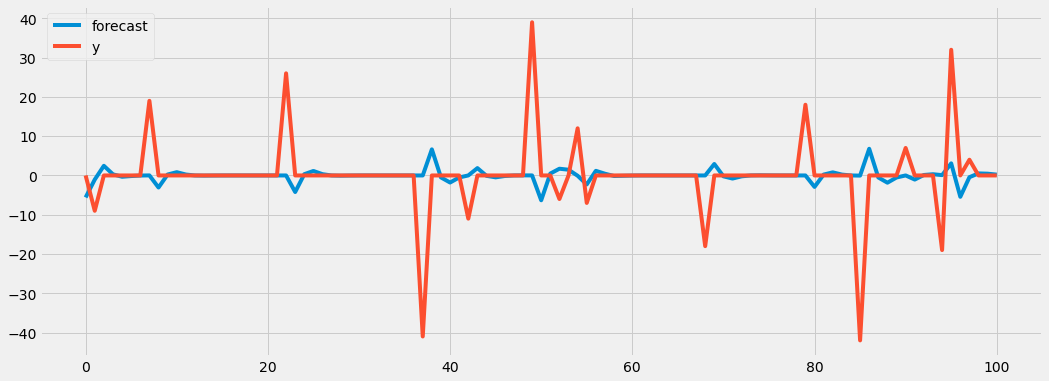

In [65]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [66]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345128339268205.


## 4.3. Autoregressive Moving Average (ARMA)

> Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.

- ARMA 모델은 "과거의 상태와 오차값을 사용해 현재의 상태를 예측하는 모델"
- AR, MA 두가지 관점에서 1 윈도우가 이전만큼의 과거를 참고하는 것을 ARMA(1, 1)이라고 표기하며, 아래의 수식과 같다.

$$X(t) = (X_{t-1} * w_{11}) + (\epsilon_{t-1} * w_{21}) + b + (\epsilon_t * u)$$


/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -10110.919
Method:                       css-mle   S.D. of innovations              6.898
Date:                Fri, 16 Oct 2020   AIC                          20237.837
Time:                        23:23:53   BIC                          20285.936
Sample:                             0   HQIC                         20255.133
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2770      0.116      2.386      0.017       0.049       0.505
ar.L1.y        0.6383      0.452      1.411      0.158      -0.249       1.525
ar.L2.y        0.0700      0.528      0.133      0.8

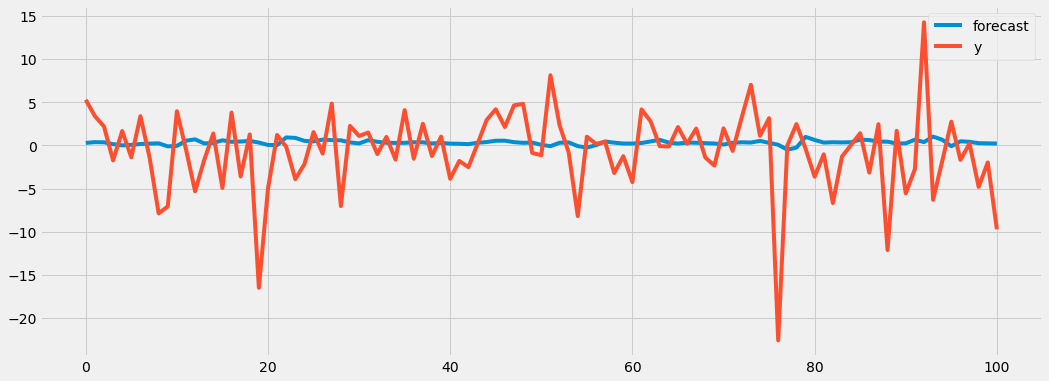

In [67]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(google["Close"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.909
Date:                Fri, 16 Oct 2020   AIC                         110833.948
Time:                        23:23:55   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9915.197     -2.047      0.041   -3.97e+04    -863.792
ar.L1.y        0.2053      0.160      1.286      0.198      -0.107       0.518
ar.L2.y        0.7296      0.179      4.079      0.0

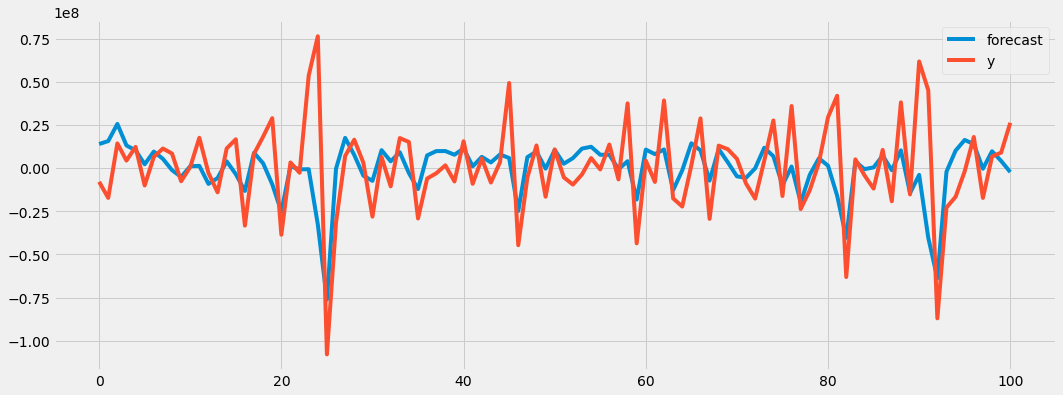

In [68]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [69]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038324.42614156.


## 4.4. Autoregressive Integrated Moving Average (ARIMA)

> An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model.

- ARMA에 Integrated 라는 개념을 추가한 모델
- **ARIMA**나 **ARMA** 둘다 시계열데이터에서 데이터를 이해하거나 미래의 값을 예측하기에 적합
- **ARIMA** 모델은 데이터가 비정상성의 증거를 보여주는 일부 경우에 적용 가능, 즉 불규칙 시계열 데이터를 조금 더 잘 분석할 수 있는 방법 
    + 여기서 초기 차분 단계 (모델의 "통합 된"부분에 해당)를 한 번 이상 적용하여 비정상 성 제거 가능 
    + 관측치 사이의 차분이라는 개념을 사용
 
### 차분

$$
\begin{align}
&(d = 0): x_t = X_t \\
&(d = 1): x_t = X_t - X_{t-1} \\
&(d = 2): x_t = (X_t - X_{t-1}) - (X_{t-1} - X_{t-2})
\end{align}
$$

### ARIMA(p, d, q)

$$
\hat{y} = \mu + (w_{11}*y_{t-1} + \cdots + w_{1p} * y_{t-p}) - (w_{21} * \epsilon_{t-1} + \cdots + w_{2p} * \epsilon_{t-p})
$$


- 최적의 파라미터 p, d, q를 찾기 위해 주로 ACF와 PACF를 활용하게 된다.

/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.009
Date:                Fri, 16 Oct 2020   AIC                         112778.933
Time:                        23:19:16   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

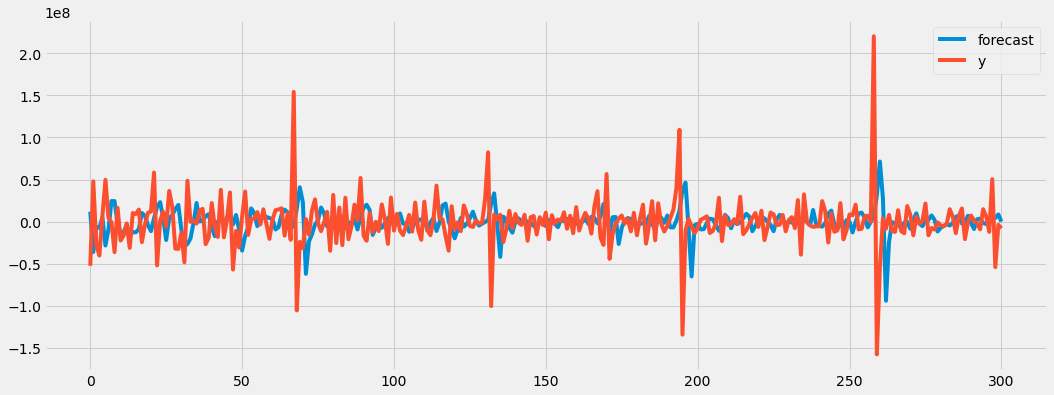

In [57]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [72]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 41726374.41619934.


## 4.5. Vector Autoregressive (VAR)

> Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series.

VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/home/sanghoho/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Fri, 16 Oct 2020   BIC                          24506.556
Time:                        23:26:11   HQIC                         24441.100
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):   48242.52, 14926.51
Prob(Q):                        0.99, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

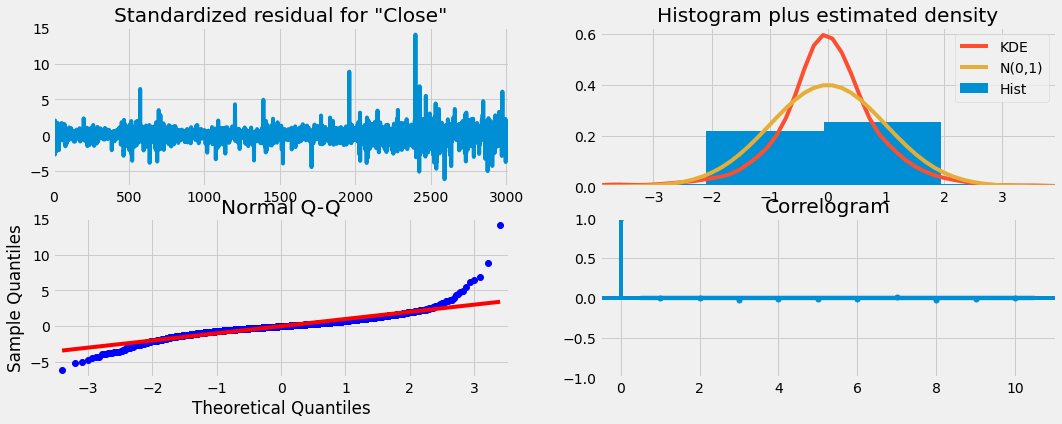

In [73]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## 4.6. SARIMA model

> SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. 

The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

### State Space methods

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10098.796
Date:                Fri, 16 Oct 2020   AIC                          20217.592
Time:                        23:26:38   BIC                          20277.716
Sample:                             0   HQIC                         20239.212
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1077      0.047      2.269      0.023       0.015       0.201
ar.L1          0.2275      0.007     34.155      0.000       0.214       0.241
ar.L2          1.1222      0.006    199.844      0.0

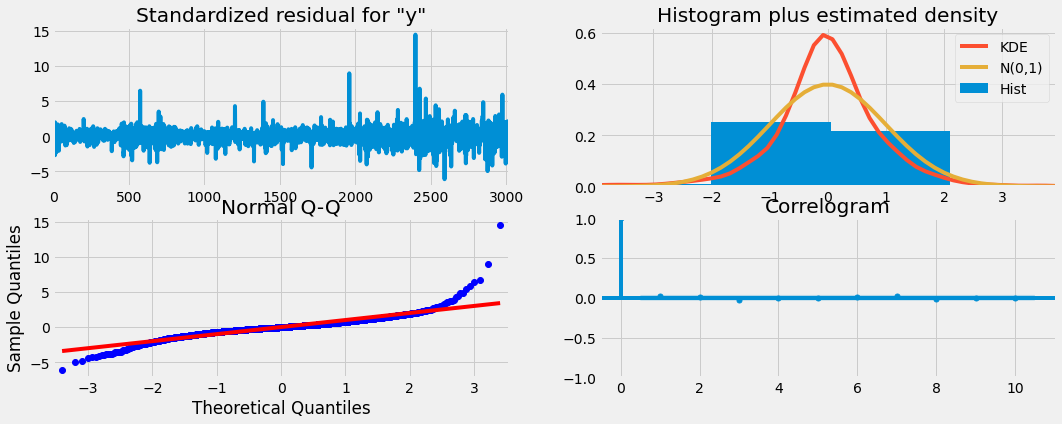

In [74]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))


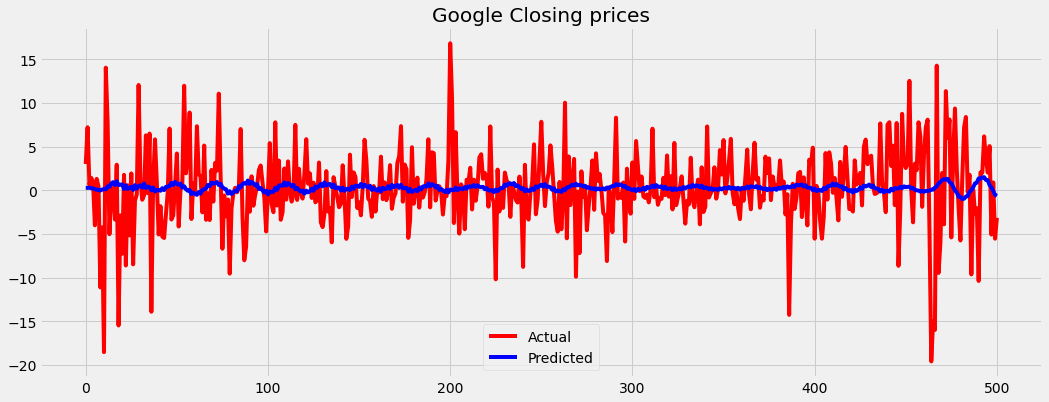

In [75]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

# Appendix

## 주요 모형 요약

- AR의 경우, 현재와 과거의 자신과의 관계를 정의 
- MA의 경우, 현재와 과거 자신의 오차와의 관계를 정의
- ARMA은 현재와 과거의 자신 그리고 자신과의 오차를 동시에 고려하여 정의
- ARIMA는 현재와 추세(트렌드 변화)간의 관계를 정의

## 추가 공부

- 시계열 모델링
    + State Space Model
        + Unobserved components
        + Dynamic Factor models
    + GRACH
    + Prophet
    + 다변량 시계열 

- 신호처리
- Topological Data Analysis for time series